<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_84_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 84: Support Vector Machines - Hyperplane Visualisation II

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Support Vector Machines - Hyperplane Visualisation II|
|||
|**Class Description**|In this class, a student will create a visualisation of different SVC classification models|
|||
|**Class**|C84|
|||
|**Class Time**|50 minutes|
|||
|**Goal**|Define functions for creating mesh grid, the decision boundary|
||Create model visualisation of SVC using linear, RBF, and polynomial kernel|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous class, you learned to create a 2D mesh grid using the `numpy.meshgrid()` function and contour plots using the `contour()` and `contourf()` functions of the `matplotlib.pyplot` module. In this class, you will learn to visualise the hyperplanes generated by a Support Vector Classifier (SVC).

Let's quickly go through the activities covered in the previous classes and begin this class from **Activity 1: The `create_meshgrid()` function** section.

---

### Data Description

The dataset used in the problem statement, popularly known as **Iris Dataset** or **Fisher's Dataset**, is published by UCI Machine Learning Repository. It contains 3 classes of 50 instances each, where each class refers to a type of Iris flower namely:
- **Iris-setosa**
- **Iris-virginica**
- **Iris-versicolor**

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/Iris-update-1.png' width = 800>

***Image Credits:*** https://en.wikipedia.org/wiki/Iris_flower_data_set
```
  A. Image of Iris setosa by SteinsplitterBot, used under license Attribution-Share Alike 3.0 Unported from Wikimedia Commons.
  B. Image of Iris versicolor by Dlanglois, used under license Attribution-Share Alike 2.5 Generic from Wikimedia Commons.
  C. Image of Iris virginica by Flickr upload bot, used under license Attribution-Share Alike 2.0 Generic from Wikimedia Commons.
```

The big idea is that based on the length and width of sepals and petals of a flower, can we build a classification model that tells us the species of a particular Iris flower? The answer is "yes, we can". This is exactly what we will do in the next few classes.

The columns in the dataset are as follows:

|Name|Description|
|-|-|
|`Id`| Id of the instance or record|
|`SepalLengthCm`| Length of the sepal in cm|
|`SepalWidthCm`| Width of the sepal in cm|
|`PetalLengthCm`| Length of the petal in cm|
|`PetalWidthCm`|Width of the petal in cm|
|`Species`|Name of the type of the flower|

**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/iris  

**Dataset Creator:** R.A. Fisher

**Citation:**
```
Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.
```



---

#### Recap

So let's go through the routine steps before we build a classification model and explore the dataset.

Link to the dataset: https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv

In [ ]:
# Load the dataset.
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset.
iris_df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv")
print(iris_df.head(), "\n")

# Get information about the dataset.
print(iris_df.info(), "\n")

# Get the count of each type of flower samples in the dataset.
print(iris_df['Species'].value_counts(), "\n")

# Add a column in the Iris DataFrame to resemble the non-numeric 'Species' column as numeric using 'map()' function.
# Create the numeric target column 'Label' to 'iris_df' using the 'map()' function.
iris_df['Label'] = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})

# Verify the count of each type of flower samples in the 'Label' column.
print(iris_df['Label'].value_counts())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None 

Iris-setosa

----

#### Data Visualisation

Scatter plot between `SepalLengthCm` and `PetalLengthCm` to differentiate between the data points of different classes using the `hue` parameter:

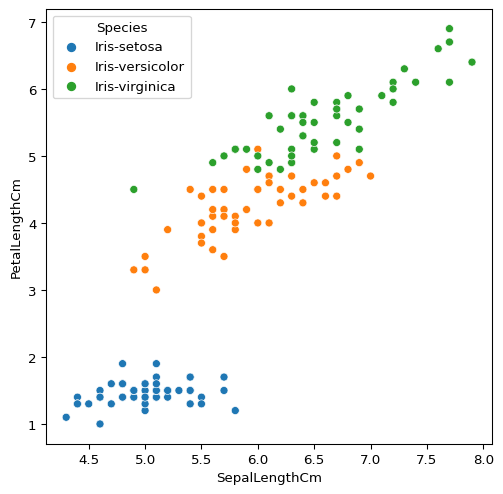

In [ ]:
# Scatter plot between the 'SepalLengthCm' & 'PetalLengthCm' columns and differentiate between the data points of different classes.
plt.figure(figsize = (6, 6), dpi = 96)
sns.scatterplot(data = iris_df, x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species')
plt.show()

As per the properties, the output again displays two clusters where the **`Iris-setosa`** has the smallest sepal length and petal length of the three classes, **`Iris-versicolor`** has the medium petal length and **`Iris-virginica`** has a high petal length. But due to the small margin between the medium and high sepal length, the **`Iris-versicolor`** and **`Iris-virginica`** data points are overlapping each other.

Similarly, we saw a relation between other columns as well.

----

#### Model Building

Let's create a new SVM classification model using the independent features `SepalLengthCm` and `PetalLengthCm` only and target variable as `Label` which will classify the flowers into label `0`, `1`, and `2`:

In [ ]:
# Create an SVM-based classification model to classify the species of the Iris flower into the labels '0', '1', and '2'.
# Import all the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create X and y variables
X = iris_df[['SepalLengthCm', 'PetalLengthCm']]
y = iris_df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Create the SVC model
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)
print(f"Accuracy score: {svc_model.score(X_train, y_train) * 100}%\n")

#  Make predictions on the train dataset using the 'predict()' function.
# Compute the predictions
svc_y_train_pred = pd.Series(svc_model.predict(X_train))

# Print the occurrence of each flower type computed in the predictions.
print(f"Labels identified for the TRAIN set:\n{svc_y_train_pred.value_counts()}\n")

# Make predictions on the test dataset using the 'predict()' function.
# Compute the predictions
svc_y_test_pred = pd.Series(svc_model.predict(X_test))

# Print the occurrence of each flower type computed in the predictions.
print(f"Labels identified for the TEST set:\n{svc_y_test_pred.value_counts()}")

Accuracy score: 96.0%

Labels identified for the TRAIN set:
1    36
2    33
0    31
dtype: int64

Labels identified for the TEST set:
0    19
2    16
1    15
dtype: int64


As it can be observed all three labels are identified. Let's create a confusion matrix to calculate true positives, false positives, true negatives, and false negatives to evaluate the SVC linear model:

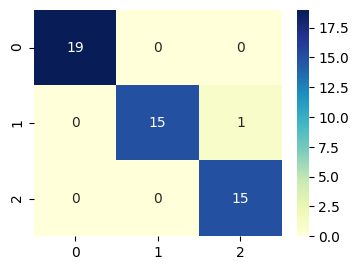

In [ ]:
# Create the confusion matrix (in the form of a heatmap) for the test set.
# Import the libraries
from sklearn.metrics import confusion_matrix, classification_report

# Print the confusion matrix
cm = confusion_matrix(y_test, svc_y_test_pred)
cm_df = pd.DataFrame(data = cm, index = [0, 1, 2], columns = [0, 1, 2])

plt.figure(figsize = (4, 3), dpi = 100)
sns.heatmap(data = cm_df, annot = True, cmap = 'YlGnBu') # 'YlGnBu' sets the colour gradient of the heatmap to yellow, green and blue.
plt.show()

The confusion matrix displays that 1 sample of class `1` is misclassified as class `2`.

Let's print the classification report to observe the recall, precision, and f1-scores for linear SVC on Iris DataFrame:

In [ ]:
# S.1:5: Display the recall, precision and f1-score values for the test set.
print(classification_report(y_test, svc_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



---

####  The `numpy.meshgrid()` Function

Before we learn to visualise the hyperplane generated by an SVC model, let's refresh our knowledge of creating a mesh grid. For this, you need to use the `meshgrid()` function of the NumPy module. It creates a rectangular grid (or two-dimensional array) out of two different one-dimensional arrays, say `x` and `y`.

For example, suppose you want to create the following graph:

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/meshgrid-example-1.png' width = 700></center>

The coordinates of each of the red dots are:

\begin{equation}
(-2, -3), (-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3) \\
(-1, -3), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3) \\
(0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3) \\
(1, -3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3) \\
(2, -3), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (2, 3) \\
\end{equation}

As shown in the image below:

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/meshgrid-example-2.png' width = 700></center>

Each of these coordinates is **ordered-pairs** of the items stored in the `x` and `y` one-dimensional arrays wherein each item of array `x` is paired with each item of array `y`.

To create such ordered pairs, you need to use the `meshgrid()` function of the NumPy module. In the above example, `the meshgrid()` function will return two arrays of 2 dimensions.

The first array will have the following items:
```
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
```

And the second array will have the following items:
```
[[-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]]
```

If you pair the items located at the corresponding positions in both the arrays, you will get the required ordered pairs.

So let's create two different one-dimensional arrays to further create the above two different two-dimensional arrays:

Then, use the `meshgrid()` function of the NumPy module to generate the required two-dimensional arrays. It takes 2 different one-dimensional arrays as inputs.

**Syntax:** `np.meshgrid(one_dim_array1, one_dim_array2)`

Where `one_dim_array1` and `one_dim_array2` are 2 different one-dimensional arrays.

**Note:** To unpack the values returned by the `meshgrid()` function, we will use two different variables in the same line separated by a comma.

In [ ]:
# Create the required 2 one-dimensional NumPy arrays.
# Create the first array containing the values -2, -1, 0, 1, 2.
one_dim_array_x = np.linspace(-2, 2, 5)

# Create the second array containing the values -3, -2, -1, 0, 1, 2, 3.
one_dim_array_y = np.linspace(-3, 3, 7)

# Print both the above arrays.
print("1st array:", one_dim_array_x)
print("2nd array:", one_dim_array_y)

# Generate the required 2 two-dimensional arrays from 2 one-dimensional arrays.
two_dim_array_xx, two_dim_array_yy = np.meshgrid(one_dim_array_x, one_dim_array_y)

# Print the 1st two-dimensional array and its shape.
print(two_dim_array_xx, "\n")
print(two_dim_array_xx.shape, "\n")

# Print the 2nd two-dimensional array and its shape.
print(two_dim_array_yy, "\n")
print(two_dim_array_yy.shape)

1st array: [-2. -1.  0.  1.  2.]
2nd array: [-3. -2. -1.  0.  1.  2.  3.]
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]] 

(7, 5) 

[[-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]] 

(7, 5)


Both the two-dimensional arrays have 35 items as there should be to create 35 ordered pairs.

Now let's create the first scatter plot:

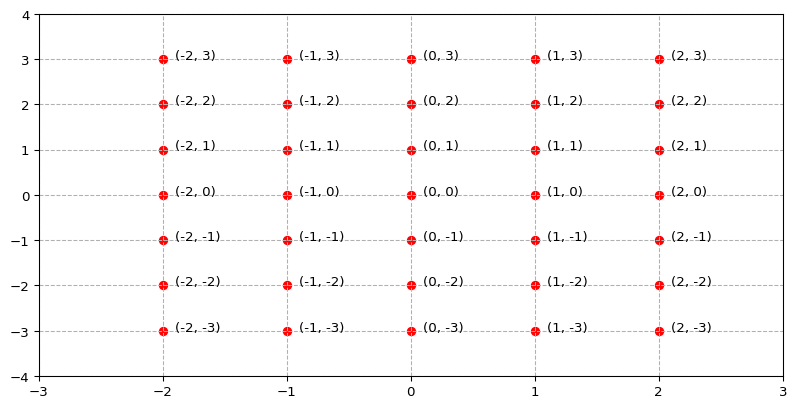

In [ ]:
# Create  the scatter plot having the red dots at the above mentioned coordinates
# Annotate the graph such that that the corresponding coordinates of the red dots are also printed along with them.
plt.figure(figsize = (10, 5), dpi = 96)
plt.scatter(two_dim_array_xx, two_dim_array_yy, marker = 'o', color = 'r')
plt.xticks(np.arange(-3, 4))
plt.yticks(np.arange(-4, 5))
plt.grid(which = 'major', axis = 'both', linestyle = '--')
for i in range(-2, 3):
  for j in range(-3, 4):
    plt.annotate(s = f"({i}, {j})", xy = (i + 0.1, j)) # i + 0.1 offsets the location of the annotation by 0.1 units on the x-axis.
plt.show()

As you can see, we have obtained the required scatter plot.

In the above code:
```
for i in range(-2, 3):
  for j in range(-3, 4):
    plt.annotate(s = f"({i}, {j})", xy = (i + 0.1, j))
```

Above part of the code creates a nested `for` loop. The outer `for` loop generates values for the $x$-axis ($-2, -1, 0, 1, 2$) and the inner `for` loop generates the values for the $y$-axis ($-3, -2, -1, 0, 1, 2, 3$) for each $x$ value. The latter also annotates each red dot with its corresponding coordinates such that they are their horizontal positions are offset by 0.1 units.

---

#### The Contours

**The `contour()` function:** You can create contour lines using the `contour()` function of the `matplotlib.pyplot` module. However, opposite to the real-life contour lines, the contour lines of the smallest curvature generated by this function represent the lowest value. And as you move outward, the values represented by the contour lines increase.

Let's understand this concept with the help of an example. We will create circular contour lines. For this, we need:

- Two arrays of two dimensions generated by the `numpy.meshgrid()` as you have already seen in the previous activity of this class.

- Another two-dimensional array that represents the points in a circle. To get the points on a circle square the $x$-coordinates and $y$-coordinates and add them together i.e. $z = x^2 + y^2$

- The `contour()` function. It primarily takes 3 parameters as inputs:

  1. A two-dimensional array containing $x$ values.
  2. A two-dimensional array containing $y$ values.
  3. A two-dimensional array containing $z$ values.

  **Syntax:** `plt.contour(x, y, z)`

  Additionally can provide two more parameters to the `contour()` function that are:

  1. `cmap`: It sets the colour of the contour lines.
  2. `alpha`: It sets the brightness of the colours of the contour lines. Its value goes from 0 to 1 where 1 denotes the highest brightness.

  **Syntax:** `plt.contour(x, y, z, cmap, alpha)`

- The `colorbar()` function. It displays the different colours used for the contour lines wherein each colour represents whether the numerical value denoted by a contour line is high or low.

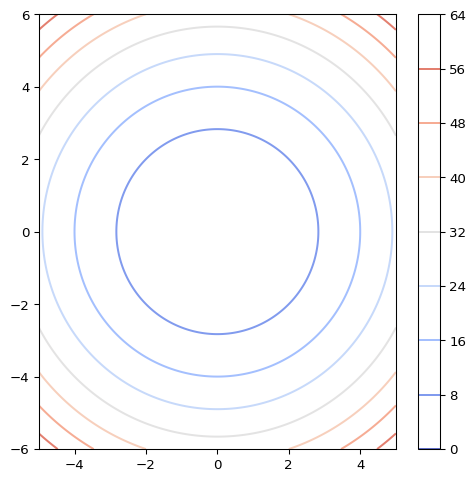

In [ ]:
# Create circular contour lines as described above.
# Create two different two-dimensional.
x_values = np.linspace(-5, 5, 1100) # Generating 1100 points
y_values = np.linspace(-6, 6, 1300) # Generating 1300 points

# Create two-dimensional arrays from the above 2 one-dimensional arrays.
xx_values, yy_values = np.meshgrid(x_values, y_values)

# Use the equation of the circle to generate points for the circular contour lines.
zz_values = xx_values ** 2 + yy_values ** 2

# Create the circular contour lines as stated above.
plt.figure(figsize = (6, 6), dpi = 96)
plt.contour(xx_values, yy_values, zz_values, cmap = plt.cm.coolwarm, alpha = 0.8) # plt.cm.coolwarm defines the colour scheme for contour lines.
plt.colorbar()
plt.show()

As you can see, we have created the required circular contour lines. The purple colour shows the least value as shown on the colour bar and the amber colour shows the greatest value.

**Note:** We generated thousands of x and y values so that the circular contour lines are smooth. If you plot contour lines only for few values, the circles won't be smooth and perfect. Rather they would appear distorted having sharp edges.

**The `contourf()` function:** This function does exactly the same operation as the `contour()` function. Additionally, it fills the gaps between the contour lines.

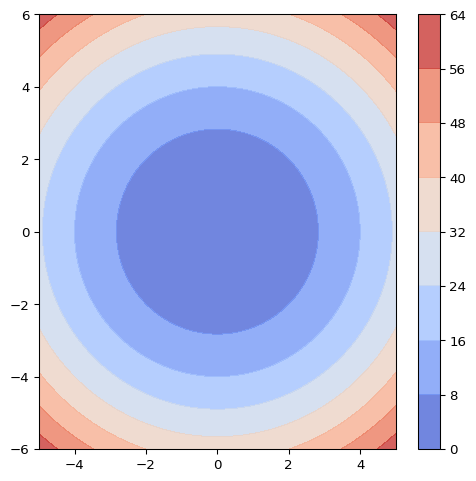

In [ ]:
# Repeat the above exercise by replacing the 'contour()' function with the 'contourf()' function.
plt.figure(figsize = (6, 6), dpi = 96)
plt.contourf(xx_values, yy_values, zz_values, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.colorbar()
plt.show()

As you can see, the gaps between the contour lines are now filled with colours and the colour bar shows the band of colours instead of a line.

Let's use the knowledge of the `meshgrid()` and `contourf()` functions to visualise a hyperplane generated by an SVC model.

---

#### Activity 1: The `create_meshgrid()` Function^

Model visualisation is a great way of looking into the working of the model based on different parameters passed to increase the accuracy and decrease the error rate.

The SVC model visualisation requires both `meshgrid()` and `contourf()` functions as input parameters as we have to visualise the hyperplane (decision surface) to observe the behaviour of the model.

Let's divide the code and create two functions one for creating a mesh grid and another for a contour  so that we can use them repeatedly to visualise different modules.

Let's define the `create_meshgrid()` function. It takes two 1D arrays as inputs and returns the mesh grid generated by the `meshgrid()` function of the `numpy` module. Inside the function:
  
  - Define the minimum and maximum values of $x$ using $x - 1$ and $x + 1$ respectively.
  
  - Similarly, define the minimum and maximum values of $y$ using $y - 1$ and $y + 1$ respectively.
  
  - Create two 1D NumPy arrays for $x$ and $y$ axes values using the minimum and maximum values defined above such that the consecutive values in both the arrays differ by 0.2 and then pass these two arrays to the `meshgrid()` function as inputs.
  
  - The `meshgrid()` function will return the two 2D arrays that you can store in the `xx` and `yy` variable.

In [ ]:
# S1.1: Define the 'create_meshgrid()' function as described above.
def create_meshgrid(x, y):
    x_min, x_max = x.min() - 1, x.max() + 1 # To generate the values for the x-axis array.
    y_min, y_max = y.min() - 1, y.max() + 1 # To generate the values for the y-axis array.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2)) # The consecutive values in both xx and yy arrays will differ by 0.2

    return xx, yy

Now, let's test the `create_meshgrid(x, y)` function by creating a mesh grid using two different NumPy 1D arrays of 5 random integers having:

- First array: Numbers from `1` to `10`

- Second array: Numbers from `11` to `20`

In [ ]:
# S1.2: Test the 'create_meshgrid()' function by creating a mesh grid using two different NumPy arrays of 5 random integers.

# Create 1D arrays.
rand_x_array = np.random.randint(1, 10, 5)
rand_y_array = np.random.randint(11, 20, 5)

print(f"X-axis 1D array \n{rand_x_array}")
print(f"Y-axis 1D array \n{rand_y_array}\n")

# Create a mesh grid using the 'create_meshgrid()' function.
rand_xx , rand_yy = create_meshgrid(rand_x_array, rand_y_array)

# Print both the arrays
print(f"X-axis 2D array \n{rand_xx}")
print(f"Y-axis 2D array \n{rand_yy}\n")

X-axis 1D array 
[1 2 4 4 2]
Y-axis 1D array 
[19 18 12 13 17]

X-axis 2D array 
[[0.  0.2 0.4 ... 4.4 4.6 4.8]
 [0.  0.2 0.4 ... 4.4 4.6 4.8]
 [0.  0.2 0.4 ... 4.4 4.6 4.8]
 ...
 [0.  0.2 0.4 ... 4.4 4.6 4.8]
 [0.  0.2 0.4 ... 4.4 4.6 4.8]
 [0.  0.2 0.4 ... 4.4 4.6 4.8]]
Y-axis 2D array 
[[11.  11.  11.  ... 11.  11.  11. ]
 [11.2 11.2 11.2 ... 11.2 11.2 11.2]
 [11.4 11.4 11.4 ... 11.4 11.4 11.4]
 ...
 [19.4 19.4 19.4 ... 19.4 19.4 19.4]
 [19.6 19.6 19.6 ... 19.6 19.6 19.6]
 [19.8 19.8 19.8 ... 19.8 19.8 19.8]]



Let's observe the minimum and maximum values for both the axes.

In [ ]:
# S1:3 Verify the minimum and maximum value of the arrays

# Verify the minimum value of X-axis array
print(f"The minimum value of the X-axis 1D array is {rand_x_array.min()}")
print(f"The minimum value of the X-axis 2D array is {rand_xx.min()}")

# Verify the maximum value of X-axis array
print(f"The maximum value of the X-axis 1D array is {rand_x_array.max()}")
print(f"The maximum value of the X-axis 2D array is {rand_xx.max()}\n")

# Verify the minimum value of Y-axis array
print(f"The minimum value of the Y-axis 1D array is {rand_y_array.min()}")
print(f"The minimum value of the Y-axis 2D array is {rand_yy.min()}")

# Verify the maximum value of Y-axis array
print(f"The maximum value of the Y-axis 1D array is {rand_y_array.max()}")
print(f"The maximum value of the Y-axis 2D array is {rand_yy.max()}")

The minimum value of the X-axis 1D array is 1
The minimum value of the X-axis 2D array is 0.0
The maximum value of the X-axis 1D array is 4
The maximum value of the X-axis 2D array is 4.800000000000001

The minimum value of the Y-axis 1D array is 12
The minimum value of the Y-axis 2D array is 11.0
The maximum value of the Y-axis 1D array is 19
The maximum value of the Y-axis 2D array is 19.79999999999997


As you can see, both the 2D arrays i.e. the mesh grid arrays ensure that the minimum and maximum boundaries of the grid cover all the points of the arrays.

Now let's move ahead and create a function for contour.

----

#### Activity 2: The `numpy.c_` Expression & `numpy.ravel()` Function

We want to create another function that will draw a contour plot. But before that, we need to learn the `c_` parameter and `ravel()` function of the `numpy` module to carry out two specific tiny tasks.

The **`numpy.c_` expression** works like a function. It combines all the 1D arrays to return a 2D array such that each 1D array a column in the 2D array.

Eg., for the two 1D arrays `[1, 2, 3]` and `[4, 5, 6]`, the `numpy.c_` expression (to be used as **`numpy.c_[array1, array2]`**) will return the following array:

```
[[1, 4],
 [2, 5],
 [3, 6]]
```

You can clearly see that items `1, 2, 3` are part of column 0 and similarly, items `4, 5, 6` are part of column 1 in the new 2D array.


In [ ]:
# S2.1: Create three 1D arrays and concatenate them into a single 2D array using the 'numpy.c_' expression.

# Create three 1D arrays
one_dim_array1 = np.random.randint(1, 10, 5) # 5 items
one_dim_array2 = np.random.randint(11, 20, 5) # 5 items
one_dim_array3 = np.random.randint(101, 120, 5) # 5 items

print(f"1st one-dimensional array: {one_dim_array1}")
print(f"2nd one-dimensional array: {one_dim_array2}")
print(f"3rd one-dimensional array: {one_dim_array3}")

# Concatenate the arrays
one_dim_array4 = np.c_[one_dim_array1, one_dim_array2, one_dim_array3]
print(f"\nConcatenated array:\n{one_dim_array4}")
print(f"\nObject type of the concatenated array: {type(one_dim_array4)}")

1st one-dimensional array: [9 9 4 6 5]
2nd one-dimensional array: [18 19 14 14 17]
3rd one-dimensional array: [104 116 116 106 102]

Concatnated array:
[[  9  18 104]
 [  9  19 116]
 [  4  14 116]
 [  6  14 106]
 [  5  17 102]]

Object type of the concatenated array: <class 'numpy.ndarray'>


As we can observe, the `numpy.c_` expression has returned a 2D array. You will soon realise why we learn this expression.

**Note:**

1. For the `numpy.c_` expression to work correctly, all the 1D arrays that need to be concatenated into a single 2D array must have the same number of elements

2. For $m$ arrays, each having $n$ items, the shape of the 2D array created by the `numpy.c_` expression will be $(n, m)$. Eg, 3 one-dimensional arrays having 5 items each will result into a two-dimensional array having $(5, 3)$ shape and $5 \times 3 = 15$ items.

**The `ravel()` function** flattens a 2D array to a 1D array. Eg, the `ravel()` function will flatten the 2D array

```
[[1, 4],
 [2, 5],
 [3, 6]]
```

to `[1, 4, 2, 5, 3, 6]`

The syntax for `ravel()` function is:
> **Syntax:** `numpy.ravel(array, order='C')`

The `ravel()` functions return the array with an equal number of elements as in the input array.

Let's understand the working of `ravel()` by creating a 1D array from the 2D array:

In [ ]:
# # S2.2 Flatten a 2D array using the 'ravel()' function.
print(one_dim_array4, "\n")
print("Flattened 2D array", np.ravel(one_dim_array4))
print("\nThe shape of the flattened 2D array is", np.ravel(one_dim_array4).shape)

[[  9  18 104]
 [  9  19 116]
 [  4  14 116]
 [  6  14 106]
 [  5  17 102]] 

Flattened 2D array [  9  18 104   9  19 116   4  14 116   6  14 106   5  17 102]

The shape of the flattened 2D array is (15,)


As you can observe, the `ravel()` function returns a flattened array of contiguous integers for a given multi-dimensional array.

Now that both our modular functions are created let's visualise our model by invoking them in the activity **Activity 3: Hyperplane visualisation**

---

#### Activity 3: The `plot_decision_boundary()` Function

Hyperplanes (or decision surface) in classification can be visualised by plotting the contours to segregate the data points of two classes. So, let's define another function with the name `plot_decision_boundary()` that will plot a hyperplane given an SVC model. This function takes the following inputs:
- A `matplotlib.pyplot` object

- An `SVC` object

- A 2D array for $x$ values returned by the `numpy.meshgrid()` function

- A 2D array for $y$ values returned by the `numpy.meshgrid()` function

But doesn't return anything. In this function:

- Create an array that stores the predicted values returned by the SVC classifier

- Reshape the array containing the predicted values to a 2D array

- Create a contour plot between the three 2D arrays that will be a decision boundary.


In [ ]:
# S3.1: Define the 'create_decision_boundary()' function
def create_decision_boundary(plt, clf, xx, yy ):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

In the above code:

- In the `Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])`
part of the code:
  - the `ravel()` function flattens the two 2D arrays (`xx` and `yy`) into two 1D arrays, then
  
  - the `np.c_` expression concatenates the two 1D arrays into one 2D array and then

  - the `predict()` function on the `SVC` objection predicts the classes (or labels) of the iris flower.

  **Note:** The `xx` array contains the values of one of the features, say `SepalLength` and similarly the `yy` array contains the values of another feature, say `PetalLength`. Hence, the values of both the features should be part of a 2D array to for which the `np.c_` expression is used here. This 2D array containing the feature variable values is passed to the `predict()` function that is called on the `SVC` object to predict the different species of iris flower based on their features, say `SepalLength` and `PetalLength`.

- The `Z = Z.reshape(xx.shape)` part of the code reshapes the `Z` array to the shape same as the `xx` array shape.

- Finally, the `plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)` part of the code, creates a filled contour plot on the `xx, yy` and `Z` array values.


----

#### Activity 4: Hyperplane visualisation^^

Finally, let's use the `create_meshgrid()` and `create_decision_boundary()` functions to visualise the hyperplanes created by an SVC model:

1. Create two different 1D arrays called `feature1` and `features2` from the feature columns of the Iris dataset.

2. Create a mesh grid using the `create_meshgrid()` function on the `feature1` and `features2` arrays and save the output arrays in `xx` and `yy` variables.

3. Call the `figure()` function on the `matplotlib.pyplot` object (i.e. `plt`) to define the dimensions of the graph.

4. Create a filled contour plot to visualise the hyperplane created by the  `SVC` model. For this, use the `create_decision_boundary()` function and pass the `plt` and `svc_model` model objects (created above) and the `xx` and `yy` arrays as inputs to the function.

5. Create a scatter plot between `feature1` and `feature2` arrays using the `scatter()` function. In the function, pass the following parameters as inputs:
   - `c=y` to colour code different types of iris flowers.
   - `cmap=plt.cm.coolwarm` to define the colour map for the scatters.
   - `edgecolors='k'` to define the colour of the outlines of the scatters.

6. Set the x-axis limits and y-axis limits using `plt.xlim()` and `plt.ylim() `functions to create the plot on a limited scale.

7. Label the coordinate axes and display the graph using the `show()` function.



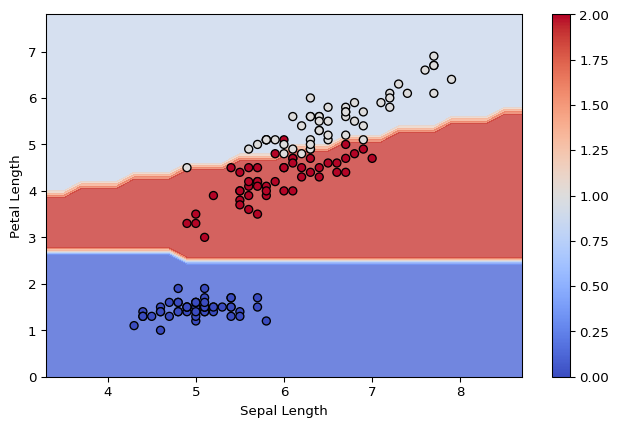

In [ ]:
# S4.1: Create the graph for model visualisation

# Create two 1D arrays
feature1, feature2 = np.array(X)[:, 0], np.array(X)[:, 1]

# Call the  'create_meshgrid()' function
xx, yy = create_meshgrid(feature1, feature2)

# Plot the graph
plt.figure(figsize = (8, 5), dpi = 96)

# Call the 'create_decision_boundary()' to create contour
create_decision_boundary(plt, svc_model, xx, yy)

# Create the scatter plot
plt.scatter(feature1, feature2, c = y, cmap = plt.cm.coolwarm, edgecolors = 'k') # c = y colour codes different flower types.

# Set the x-axis and y-axis limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Label the axes
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Display the colorbar
plt.colorbar()

# Display the graph
plt.show()

As it can be observed from the graph,

- the class `0` i.e., **`Iris-setosa`** is represented through the blue colour,

- class `1` i.e., **`Iris-virginica`** is represented through the light blue colour, and  

- class `2` i.e., **`Iris-versicolor`**  is represented through the red colour

The decision surfaces created are linear because of the linear SVC model. The data points in class `0`  are classified accurately while in the other two classes data points are in both sections.

Let's improve the model by changing the kernel function and again visualise the model.

---

#### Activity 5: RBF Kernel and Polynomial Kernel SVC Classification^^^

The model's hyperplane visualisation shows that the data points of classes `1` and `2` i.e., **`Iris-viginica`** and  **`Iris-versicolor`** are not linearly separable. Hence, the model requires non-linear decision surfaces (decision boundary or hyperplane) to classify the data points more accurately.

The Gaussian **radial basis function** kernel (RBF) and Polynomial kernel are two very common kernel functions used to create non-linear decision surfaces. We can use these two kernels to improve our model and observe the difference in the model's behaviour by hyperplane visualisation.

Let's create the model again using the steps in the above activities but change the kernel function to RBF using parameters `kernel = "rbf"` and also `gamma = 0.7`.

**Note:** For the time being, ignore the reason behind providing the `gamma=0.7` parameter as an input.

In [ ]:
# S5.1 Create an RBF SVC model for classification and print the accuracy of the model
rbf_svc_model = SVC(kernel = 'rbf', gamma = 0.7)
rbf_svc_model.fit(X_train, y_train)
print(rbf_svc_model.score(X, y))

0.9533333333333334


We can see that the model has a good accuracy of `95%`.

Let's create the graph to visualise the RBF SVC classification model:

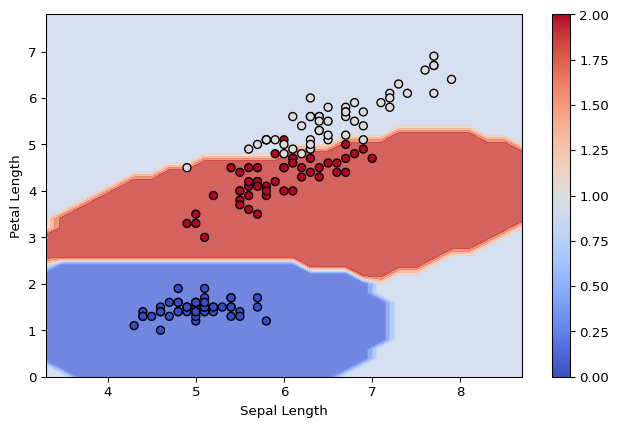

In [ ]:
# S5.2 Create Model visualisation of RBF SVC model
plt.figure(figsize = (8, 5), dpi = 96)

# Call the 'create_decision_boundary()' to create contour for RBF SVC
create_decision_boundary(plt, rbf_svc_model, xx, yy)

# Create the scatter plot
plt.scatter(feature1, feature2, c = y, cmap = plt.cm.coolwarm, edgecolors = 'k')

# Set the x-axis and y-axis limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Label the axis
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Display the colorbar
plt.colorbar()

# Display the graph
plt.show()

The decision boundary here is non-linear and can classify the class `1` and `2` values slightly better.

Let's try once again to classify the data points using the polynomial kernel in the SVC classification model using parameters `kernel = "poly"` and `gamma = 'auto` and `degree = 3`.


**Note:** Again, for the time being, ignore the reason behind providing the `gamma = 0.7` `degree = 3` parameter as inputs.


In [ ]:
# S5.3 Create a Polynomial SVC model for classification
poly_svc = SVC(kernel = 'poly', degree = 3, gamma = 'auto')
poly_svc.fit(X, y)
print(poly_svc.score(X_train, y_train))

0.95


Let's observe the graph to visualise the Polynomial SVC classification model:

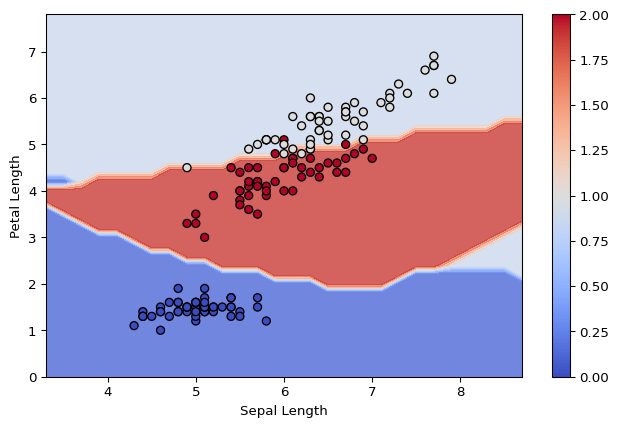

In [ ]:
# S5.4 Create Model visualisation of Polynomial SVC model

plt.figure(figsize = (8, 5), dpi = 96)

# Call the 'create_decision_boundary()' to create contour for polynomial SVC kernel.
out = create_decision_boundary(plt, poly_svc, xx, yy)

# Create the scatter plot
plt.scatter(feature1, feature2, c = y, cmap = plt.cm.coolwarm, edgecolors = 'k')

# Set the x-axis and y-axis limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Label the axis
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Display the colorbar
plt.colorbar()

# Display the graph
plt.show()

The decision boundary here again is non-linear and can classify the class `2` values slightly better.

In this case, we can use any one of the RBF or Polynomial kernels as the problem is non-linear.

**Note:** In general, the selection of the kernel depends on various things like the number of independent features, the number of instances, and the type of problems like linear, or non-linear, etc.

Let's stop here. In the next class, we will learn more about Support Vector Classification.

---

### Activities

**Teacher Activities:**

1. Support Vector Machines - Hyperplane Visualisation II (Class Copy)

   Link on Panel

2. Support Vector Machines - Hyperplane Visualisation II (Reference)

   Link on Panel

---

### **Project**
You can now attempt the **Applied Tech. Project 84 - Hyperlane Visualisation II** on your own.

**Applied Tech. Project 84 - Hyperlane Visualisation II**: https://colab.research.google.com/drive/1DVkcNeZhGunmp3B7gEfUA0TzGWTH8CdQ

---